In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [41]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [43]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [44]:
df.columns = [col.strip().replace(" ","_").lower() for col in df.columns]

In [45]:
for col in df.select_dtypes(include = "object"):
  print(col,df[col].unique())


gender ['female' 'male']
race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch ['standard' 'free/reduced']
test_preparation_course ['none' 'completed']


In [46]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


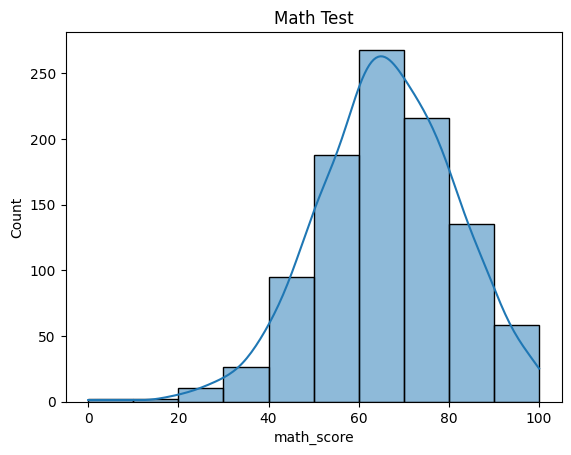

In [47]:
from ast import match_case
sns.histplot(df['math_score'],bins=10,kde=True)

plt.title("Math Test")
plt.show()

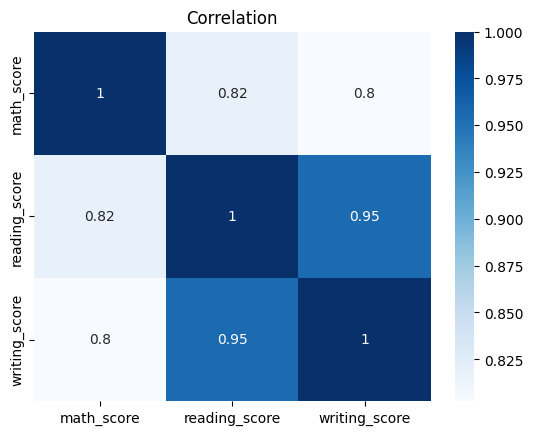

In [48]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='Blues')
plt.title("Correlation")
plt.show()

In [49]:
df['avg_score']=df[['math_score','reading_score','writing_score']].mean(axis=1)

In [52]:
x = df.drop(['avg_score','math_score','reading_score','writing_score'],axis=1)
y = df['avg_score']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [54]:
df = pd.get_dummies(df,drop_first=True)

In [55]:
df.head()

,math_score,reading_score,writing_score,avg_score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,72,72,74,72.666667,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,82.333333,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,92.666667,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,49.333333,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,76.333333,True,False,True,False,False,False,False,False,True,False,True,True


In [62]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

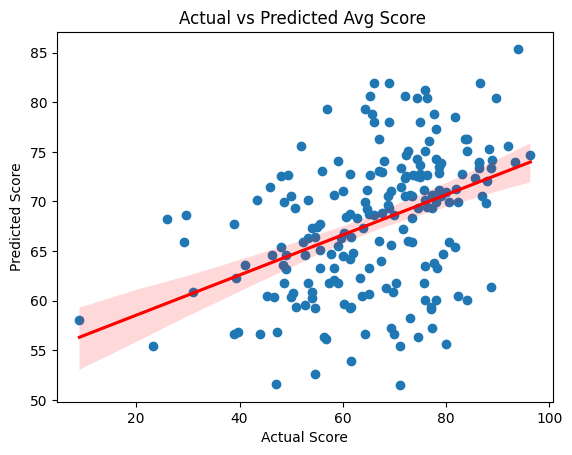

In [58]:
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred,scatter=False,color='red')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Avg Score ')
plt.show()